In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
import os
import math
base_path = '/home/zach/PythonRepos/PyScripts/Other/LooCode/'
frag = pd.read_csv(os.path.join(base_path,'Matched_Fragments_V2_TD.csv'),index_col=0)
with open(os.path.join(base_path,'Sequence.txt'),'r') as file:
    seq = file.read()
    

In [2]:
seq

'SHHWGYGKHNGPEHWHKDFPIANGERQSPVDIDTKAVVQDPALKPLALVYGEATSRRMVNNGHSFNVEYDDSQDKAVLKDGPLTGTYRLVQFHFHWGSSDDQGSEHTVDRKKYAAELHLVHWNTKYGDFGTAAQQPDGLAVVGVFLKVGDANPALQKVLDALDSIKTKGKSTDFPNFDPGSLLPNVLDYWTYPGSLTTPPLLESVTWIVLKEPISVSSQQMLKFRTLNFNAEGEPELLMLANWRPAQPLKNRQVRGFPK'

In [3]:
len(seq)

259

In [4]:
frag

,Frag_number,Frag Type,Modification,Term Mod,Observed Mass,Theoredical Mass,Start AA,End AA,Error,Sequence
0,1,A Fragment,0.0000,42.01056,2204.99341,2162.980469,1,18,1.079936,DKHWHEPGNHKGYGWHHS
1,2,A Fragment,0.0000,42.01056,3217.50263,3175.489502,1,27,0.798150,QREGNAIPFDKHWHEPGNHKGYGWHHS
6,7,C Fragment,0.0000,42.01056,13759.74368,13717.722660,1,121,0.760462,HVLHLEAAYKKRDVTHESGQDDSSGWHFHFQVLRYTGTLPGDKLVA...
7,8,Y Fragment,0.0000,0.00000,4953.62169,4953.624512,218,259,-0.569627,SQQMLKFRTLNFNAEGEPELLMLANWRPAQPLKNRQVRGFPK
9,10,Y Fragment,0.0000,0.00000,8439.45888,8439.461914,187,259,-0.359509,LDYWTYPGSLTTPPLLESVTWIVLKEPISVSSQQMLKFRTLNFNAE...
13,14,Z Fragment,0.0000,0.00000,1326.78696,1326.787842,249,259,-0.664610,LKNRQVRGFPK
15,16,Z Fragment,0.0000,0.00000,6003.24365,6003.249023,208,259,-0.895088,IVLKEPISVSSQQMLKFRTLNFNAEGEPELLMLANWRPAQPLKNRQ...
22,23,AY Fragment,0.0000,0.00000,982.47952,982.482056,104,111,-2.580876,SEHTVDRK
34,35,AY Fragment,0.0000,0.00000,2780.26627,2780.256104,54,77,3.656672,TSRRMVNNGHSFNVEYDDSQDKAV
43,44,AY Fragment,0.0000,0.00000,4150.89377,4150.928223,66,101,-8.299988,NVEYDDSQDKAVLKDGPLTGTYRLVQFHFHWGSSDD


In [5]:
frag_loc = list(np.unique(frag['Start AA']))
frag_loc.extend(list(np.unique(frag['End AA'])))
frag_loc = np.unique(frag_loc)

In [6]:
Terminal_frag_loc = list(np.unique(frag['End AA'][frag['Start AA']==1]))
Terminal_frag_loc.extend(list(np.unique(frag['Start AA'][frag['End AA']==len(seq)])))
Terminal_frag_loc.append(1)
Terminal_frag_loc.append(len(seq))
Terminal_frag_loc = np.unique(Terminal_frag_loc)
Terminal_frag_loc

array([  1,   7,  15,  16,  18,  27, 121, 124, 135, 187, 192, 208, 212,
       218, 244, 249, 253, 259])

In [7]:
Internal_frag_loc = list(np.unique(frag['End AA'][frag['Start AA']!=1]))
Internal_frag_loc.extend(list(np.unique(frag['Start AA'][frag['End AA']!=len(seq)])))
Internal_frag_loc = np.unique(Internal_frag_loc)
Internal_frag_loc

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  12,  17,  23,  24,
        25,  26,  27,  28,  29,  33,  35,  36,  38,  45,  47,  50,  52,
        53,  54,  55,  56,  57,  59,  60,  61,  62,  63,  66,  69,  70,
        71,  72,  73,  75,  76,  77,  78,  79,  81,  82,  84,  85,  86,
        87,  88,  89,  90,  92,  95,  96,  97,  99, 100, 101, 102, 104,
       106, 107, 108, 110, 111, 112, 117, 118, 119, 120, 121, 123, 124,
       125, 126, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 145, 146, 147, 148, 151, 152, 153, 154, 155,
       156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       172, 176, 178, 182, 183, 185, 186, 187, 188, 189, 190, 193, 194,
       195, 196, 198, 200, 204, 206, 208, 209, 210, 211, 213, 215, 217,
       218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233,
       234, 236, 238, 239, 248, 249, 250, 252, 253, 254, 255, 256, 257,
       258, 259])

In [8]:
Shared_frag_loc = [i for i in Internal_frag_loc if i in Terminal_frag_loc]
Shared_frag_loc = np.unique(Shared_frag_loc)
Shared_frag_loc

array([  1,   7,  27, 121, 124, 135, 187, 208, 218, 249, 253, 259])

In [9]:
start_aa = np.unique(frag['Start AA'])
end_aa = np.unique(frag['End AA'])
master_string = []
colors = []
for i,aa in enumerate(seq):
    master_string.append(aa)
    colors.append('black')
    if i in start_aa:
        master_string.append('|')
        colors.append('red')
    elif i in end_aa:
        master_string.append('|')
        colors.append('red')
annotated = ''.join(i for i in master_string)
annotated

'SH|H|W|G|Y|G|K|H|N|GPE|HWH|K|D|F|PIANG|E|R|Q|S|P|V|DIDT|KA|V|VQ|DPALKPL|AL|VYG|EA|T|S|R|R|M|VN|N|G|H|S|FNV|EYD|D|S|Q|D|KA|V|L|K|D|GP|L|TG|T|Y|R|L|V|Q|FH|FHW|G|S|SD|D|Q|G|SE|HT|V|D|RK|K|Y|AAELH|L|V|H|W|NT|K|Y|G|DF|G|T|AA|Q|Q|P|D|G|L|A|V|V|G|V|FL|K|V|G|DAN|P|A|L|Q|K|V|L|DA|L|D|S|I|K|T|K|G|K|STD|FPNF|DP|GSLL|P|NV|L|D|Y|W|T|YP|G|S|L|T|TP|PL|LESV|TW|IV|L|K|E|P|I|SV|SS|Q|Q|M|LKF|R|T|L|N|F|N|A|E|GE|P|EL|LM|L|ANWRP|AQPL|K|N|RQ|V|R|G|F|P|K|'

In [10]:
def rainbow_text(x, y, strings, colors, orientation='horizontal',
                 ax=None, **kwargs):
    """
    Take a list of *strings* and *colors* and place them next to each
    other, with text strings[i] being shown in colors[i].

    Parameters
    ----------
    x, y : float
        Text position in data coordinates.
    strings : list of str
        The strings to draw.
    colors : list of color
        The colors to use.
    orientation : {'horizontal', 'vertical'}
    ax : Axes, optional
        The Axes to draw into. If None, the current axes will be used.
    **kwargs
        All other keyword arguments are passed to plt.text(), so you can
        set the font size, family, etc.
    """
    if ax is None:
        ax = plt.gca()
    t = ax.transData
    canvas = ax.figure.canvas

    assert orientation in ['horizontal', 'vertical']
    if orientation == 'vertical':
        kwargs.update(rotation=90, verticalalignment='bottom')

    for s, c in zip(strings, colors):
        text = ax.text(x, y, s + " ", color=c, transform=t, **kwargs)

        # Need to draw to update the text position.
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        if orientation == 'horizontal':
            t = transforms.offset_copy(
                text.get_transform(), x=ex.width, units='dots')
        else:
            t = transforms.offset_copy(
                text.get_transform(), y=ex.height, units='dots')

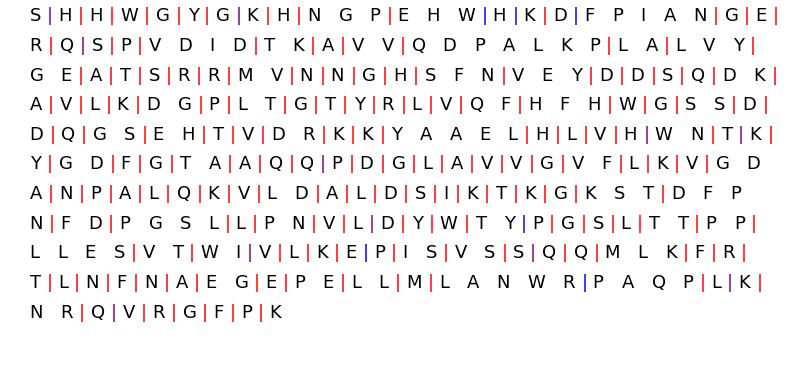

In [14]:
words = master_string
plt.figure(figsize=(6,6))
temp_words = []
temp_colors = []

Total_frag_loc = list(np.unique(frag['Start AA']))
Total_frag_loc.extend(list(np.unique(frag['End AA'])))
Total_frag_loc = np.unique(Total_frag_loc)

Terminal_frag_loc = list(np.unique(frag['End AA'][frag['Start AA']==1]))
Terminal_frag_loc.extend(list(np.unique(frag['Start AA'][frag['End AA']==len(seq)])))
Terminal_frag_loc.append(1)
Terminal_frag_loc.append(len(seq))
Terminal_frag_loc = np.unique(Terminal_frag_loc)

Internal_frag_loc = list(np.unique(frag['End AA'][frag['Start AA']!=1]))
Internal_frag_loc.extend(list(np.unique(frag['Start AA'][frag['End AA']!=len(seq)])))
Internal_frag_loc = np.unique(Internal_frag_loc)

Shared_frag_loc = [i for i in Internal_frag_loc if i in Terminal_frag_loc]
Shared_frag_loc = np.unique(Shared_frag_loc)

Colors = ['purple','blue','red']

length = len(seq)+len(frag_loc)
step = 25
lines = math.ceil(len(seq)/step)
temp_words = []
temp_colors = []
shift = 1
line = 0
size =18
for i,aa in enumerate(seq):
    temp_words.append(aa)
    temp_colors.append('black')
    if i==len(seq)-shift:
        continue
    if len(Colors)==1:
        if i+shift in frag_loc:
            temp_words.append('|')
            temp_colors.append(str(Colors[0]))
        else:
            temp_words.append('|')
            temp_colors.append('white')
    elif len(Colors)==2:
        if i+shift in Shared_frag_loc:
            temp_words.append('|')
            temp_colors.append(str(Colors[0]))
        elif i+shift in Terminal_frag_loc:
            temp_words.append('|')
            temp_colors.append(str(Colors[1]))
        elif i+shift in Internal_frag_loc:
            temp_words.append('|')
            temp_colors.append(str(Colors[0]))
        else:
            temp_words.append('|')
            temp_colors.append('white')
    elif len(Colors)==3:
        if i+shift in Shared_frag_loc:
            temp_words.append('|')
            temp_colors.append(str(Colors[0]))
        elif i+shift in Terminal_frag_loc:
            temp_words.append('|')
            temp_colors.append(str(Colors[1]))
        elif i+shift in Internal_frag_loc:
            temp_words.append('|')
            temp_colors.append(str(Colors[2]))
        else:
            temp_words.append('|')
            temp_colors.append('white')
    if (i+1)%step==0:
        rainbow_text(0, ((lines-line)/lines), temp_words, temp_colors, size=size)
        temp_words = []
        temp_colors = []
        line+=1
rainbow_text(0, ((lines-line)/lines), temp_words, temp_colors, size=size)
plt.axis('off')
plt.show()